In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report

from model import facial_emotion_model




In [2]:
fer_data = np.load("data/fer2013.npz")

X_train = fer_data["X_train"]
X_test = fer_data["X_test"]
X_val = fer_data["X_val"]

y_train = fer_data["y_train"]
y_test = fer_data["y_test"]
y_val = fer_data["y_val"]


print(X_train.shape,X_test.shape,X_val.shape)
print(y_train.shape,y_test.shape,y_val.shape)

fer_data.close()

(28709, 48, 48, 1) (3589, 48, 48, 1) (3589, 48, 48, 1)
(28709, 7) (3589, 7) (3589, 7)


In [3]:
callbacks = [
    ModelCheckpoint("models/fer_model",save_best_only=True),
    TensorBoard()
]



In [4]:
fer_model = facial_emotion_model()
fer_model.compile(loss="categorical_crossentropy",
                  optimizer="adam", metrics=["accuracy"])

fer_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_94 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
activation_94 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 48, 48, 48)        13872     
_________________________________________________________________
batch_normalization_95 (Batc (None, 48, 48, 48)        192       
_________________________________________________________________
activation_95 (Activation)   (None, 48, 48, 48)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 48, 48, 64)        2

In [5]:
traingen = ImageDataGenerator(
   rescale=1./255,
   rotation_range=10,
   horizontal_flip=True,
   width_shift_range=0.1,
   height_shift_range=0.1 
)

X_val = X_val / 255
X_test = X_test / 255

In [6]:
epoch_num = 100
batch_size = 64

history = fer_model.fit(traingen.flow(X_train,y_train,batch_size=batch_size),
            callbacks=callbacks, epochs=epoch_num,
            validation_data=(X_val,y_val))

Epoch 1/100
  1/449 [..............................] - ETA: 0s - loss: 3.0711 - accuracy: 0.1562WARNING:tensorflow:From d:\projects\facial_expression_recognition\.venv\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
449/449 [==============================] - ETA: 0s - loss: 1.8325 - accuracy: 0.2450WARNING:tensorflow:From d:\projects\facial_expression_recognition\.venv\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:

In [16]:
fer_model.save(f"models/fer2013_{history.history['val_accuracy'][-1]}")

INFO:tensorflow:Assets written to: models/fer2013_0.668709933757782\assets


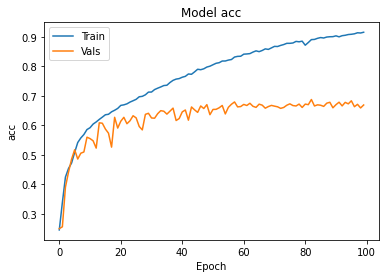

In [17]:
# print(history.history)

plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel("acc")
plt.xlabel('Epoch')
plt.legend(['Train', 'Vals'], loc='upper left')
plt.show()


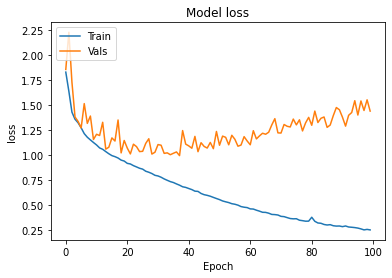

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel("loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'Vals'], loc='upper left')
plt.show()

In [19]:
fer_model.evaluate(X_test,y_test,verbose=1)

113/113 [==============================] - 2s 20ms/step - loss: 1.2960 - accuracy: 0.6857


[1.2960222959518433, 0.6857063174247742]

In [20]:
predictions = fer_model.predict(X_test,verbose=1)
y_pred = np.argmax(predictions,axis=-1)

y_true = np.argmax(y_test,axis=-1)

emotions = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]

print(classification_report(y_true,y_pred,target_names=emotions))


113/113 [==============================] - 2s 19ms/step
              precision    recall  f1-score   support

       Angry       0.60      0.62      0.61       491
     Disgust       0.84      0.67      0.75        55
        Fear       0.55      0.49      0.52       528
       Happy       0.86      0.90      0.88       879
         Sad       0.53      0.58      0.55       594
    Surprise       0.82      0.79      0.80       416
     Neutral       0.67      0.63      0.65       626

    accuracy                           0.69      3589
   macro avg       0.70      0.67      0.68      3589
weighted avg       0.69      0.69      0.68      3589

